### CaImAn toolbox wrapper functions
first, we will import the wrapper, caiman_process. In order to link caiman with our labs toolbox, we must first `pip install -e .`

In [1]:
from decode_lab_code.preprocessing.ophys.caiman_wrapper import caiman_preprocess
import matplotlib.pyplot as plt

### caiman_process - a wrapper object to support caiman analysis
Next, we will assign the object `caiman_process` to cp in order to interface with the caiman pipeline

In [2]:
# directory information
folder_name = '/Users/js0403/ophysdata/Trevor_750K2_200ms_RedGreen_depolar002'
fname_neuron = 'rec_neuron.tif'
frame_rate = 10
cp = caiman_preprocess(folder_name,fname_neuron,frame_rate)

100%|██████████| 1/1 [00:00<00:00,  6.84it/s]


### Play back the movie

In [3]:
cp.watch_movie()

### Get data out to explore it

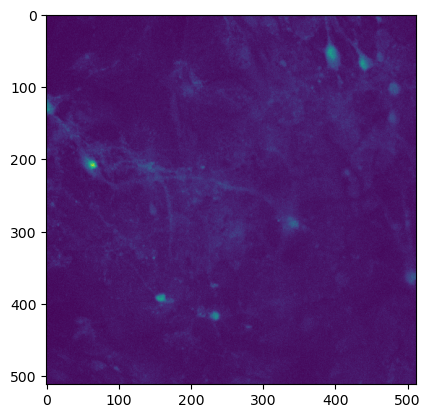

In [4]:
frames = cp.get_frames()
frames.shape
plt.imshow(frames[0,:,:])

In [7]:
# motion correct
fname_new, opts = cp.motion_correct(False)

This might take a minute...


In [8]:
fname_new

'/Users/js0403/ophysdata/Trevor_750K2_200ms_RedGreen_depolar002/memmap_d1_512_d2_512_d3_1_order_C_frames_514.mmap'

In [ ]:
import caiman as cm
# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new)
images = Yr.T.reshape((T,) + dims, order='F')

# parameters for source extraction and deconvolution
p = 1               # order of the autoregressive system
K = None            # upper bound on number of components per patch, in general None
gSig = (3, 3)       # gaussian width of a 2D gaussian kernel, which approximates a neuron
gSiz = (13, 13)     # average diameter of a neuron, in general 4*gSig+1
Ain = None          # possibility to seed with predetermined binary masks
merge_thr = .7      # merging threshold, max correlation allowed
rf = 40             # half-size of the patches in pixels. e.g., if rf=40, patches are 80x80
stride_cnmf = 20    # amount of overlap between the patches in pixels
#                     (keep it at least large as gSiz, i.e 4 times the neuron size gSig)
tsub = 2            # downsampling factor in time for initialization,
#                     increase if you have memory problems
ssub = 1            # downsampling factor in space for initialization,
#                     increase if you have memory problems
#                     you can pass them here as boolean vectors
low_rank_background = None  # None leaves background of each patch intact,
#                     True performs global low-rank approximation if gnb>0
gnb = 0             # number of background components (rank) if positive,
#                     else exact ring model with following settings
#                         gnb= 0: Return background as b and W
#                         gnb=-1: Return full rank background B
#                         gnb<-1: Don't return background
nb_patch = 0        # number of background components (rank) per patch if gnb>0,
#                     else it is set automatically
min_corr = .8       # min peak value from correlation image
min_pnr = 10        # min peak to noise ration from PNR image
ssub_B = 2          # additional downsampling factor in space for background
ring_size_factor = 1.4  # radius of ring is gSiz*ring_size_factor

opts.change_params(params_dict={'method_init': 'corr_pnr',  # use this for 1 photon
                            'K': K,
                            'gSig': gSig,
                            'gSiz': gSiz,
                            'merge_thr': merge_thr,
                            'p': p,
                            'tsub': tsub,
                            'ssub': ssub,
                            'rf': rf,
                            'stride': stride_cnmf,
                            'only_init': True,    # set it to True to run CNMF-E
                            'nb': gnb,
                            'nb_patch': nb_patch,
                            'method_deconvolution': 'oasis',       # could use 'cvxpy' alternatively
                            'low_rank_background': low_rank_background,
                            'update_background_components': True,  # sometimes setting to False improve the results
                            'min_corr': min_corr,
                            'min_pnr': min_pnr,
                            'normalize_init': False,               # just leave as is
                            'center_psf': True,                    # leave as is for 1 photon
                            'ssub_B': ssub_B,
                            'ring_size_factor': ring_size_factor,
                            'del_duplicates': True,                # whether to remove duplicates from initialization
                            'border_pix': bord_px})                # number of pixels to not consider in the borders)
self.opts = opts

if show_summmary:
# compute some summary images (correlation and peak to noise)
cn_filter, pnr = cm.summary_images.correlation_pnr(self.images, gSig=gSig[0], swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile

# inspect the summary images and set the parameters
nb_inspect_correlation_pnr(cn_filter, pnr)